# Analyzing images of SDT horiz lines

Leanne Friedrich 4/27/23

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid.v_tools as vt
import py.metrics.m_SDT as me
from py.im.imshow import imshow
import py.file.file_handling as fh
import py.vid.noz_detect as nt
import pandas as pd
from py.full_sequence import SDTWorkflow, fullSequencer
LOGGERDEFINED = logs.openLog('testFailures.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# export crops

# evaluate errors

## initialize the test object

In [3]:
ft = me.failureTest(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'UnderSDTFailures.csv'), me.fileUnderSDT)

176 failed files, 20 failed folders, 75 unchecked folders, 493 total folders


## iterate through folders to check measurements and approve if correct or redoing

1. if correct, approve folder
2. if needs to be redone, run adjustments, close the folder, analyze, approve

In [441]:
fostr = ft.firstUnapprovedFolder()
ft.testFolder(fostr, diag=0, overrideSegment=False, useML=False)
ft.sw.showFailures()

IndexError: single positional indexer is out-of-bounds

In [440]:
ft.approveFolder(fostr, whiteOut=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_4.00\I_PDMSS8-S85-0.05_S_4.00_230920\disturbUnder_3_1.250\disturbUnder_3_1.250_failures_I_PDMSS8-S85-0.05_S_4.00_230920_162910_3.csv
0 failed files, 0 failed folders, 0 unchecked folders, 493 total folders


save progress

In [403]:
ft.export()

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\UnderSDTFailures.csv


## redo measurements

SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.00\I_PDMSS8-S85-0.05_S_3.00_230920\disturbUnder_3_0.500 1
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1o1_I_PDMSS8-S85-0.05_S_3.00_230920_155925_2.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1o2_I_PDMSS8-S85-0.05_S_3.00_230920_155925_2.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1o3_I_PDMSS8-S85-0.05_S_3.00_230920_155925_2.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1o4_I_PDMSS8-S85-0.05_S_3.00_230920_155925_2.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1o5_I_PDMSS8-S85-0.05_S_3.00_230920_155925_2.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1o6_I_PDMSS8-S85-0.05_S_3.00_230920_155925_2.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1o7_I_PDMSS8-S85-0.05_S_3.00_230920_155925_2.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1o8_I_PDMSS8-S85-0.05_S_3.00_230920_155925_2.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w1p1_I_PDMSS8-S85-0.05_S_3.00_230

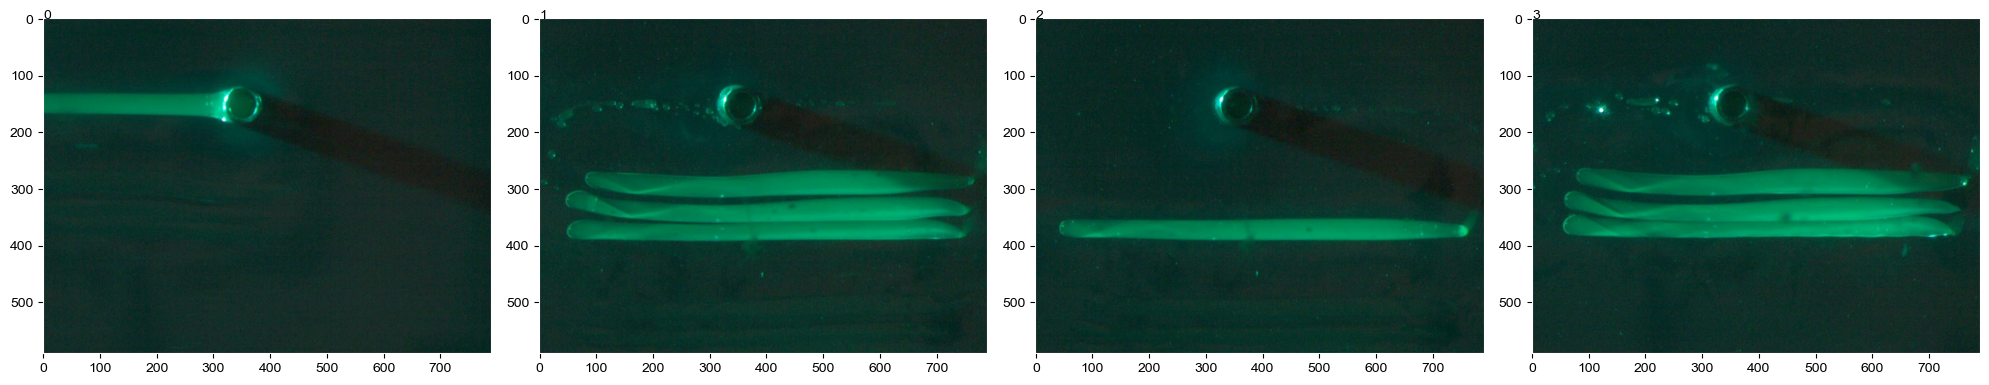

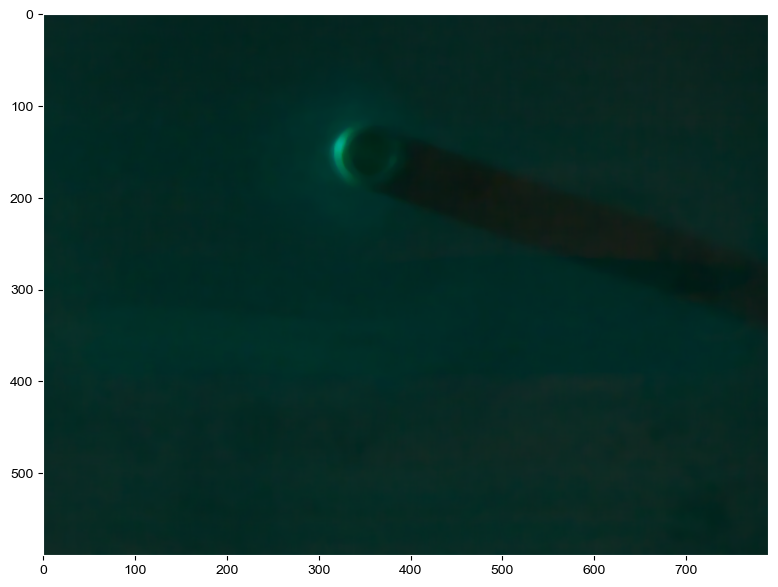

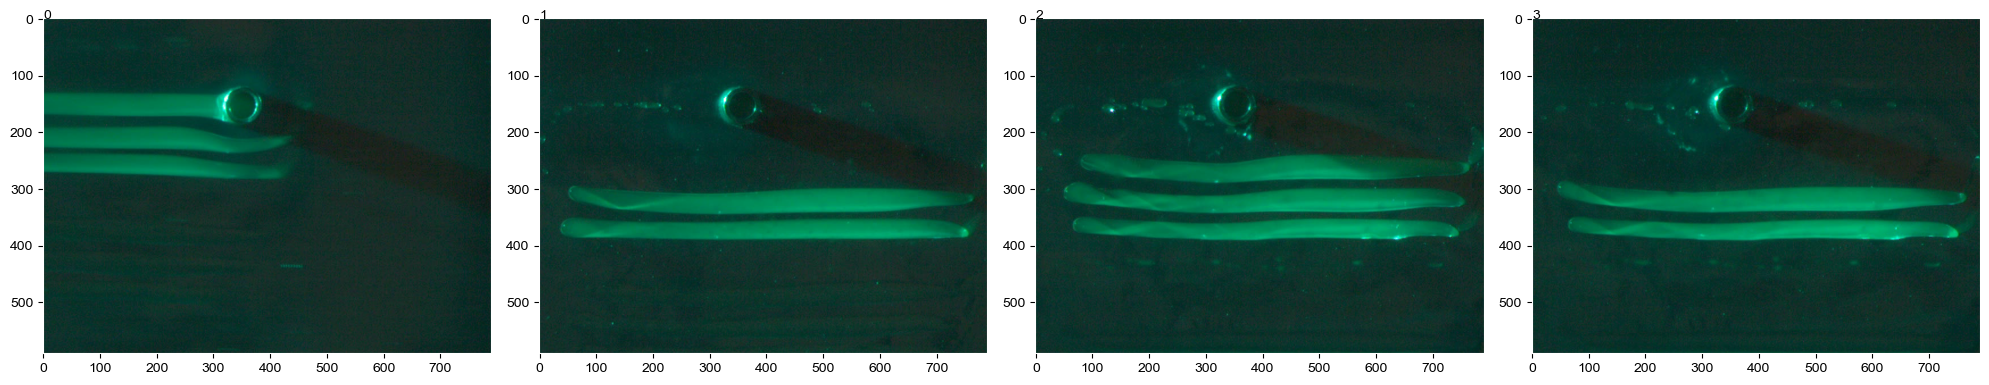

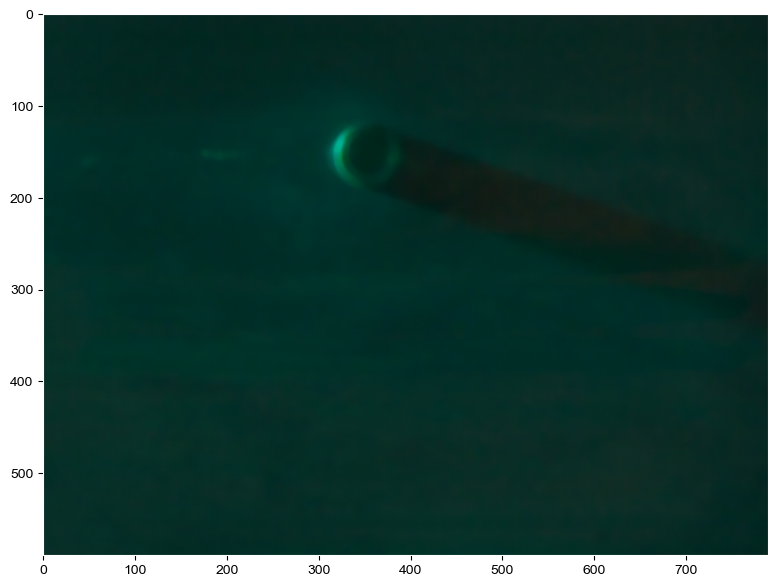

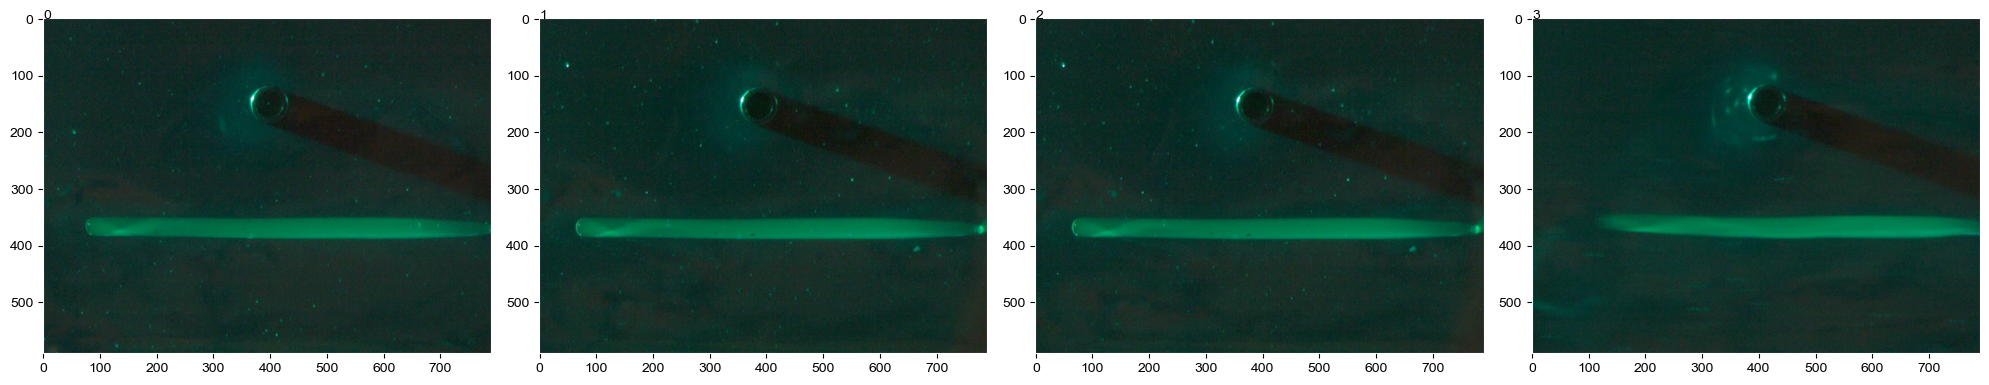

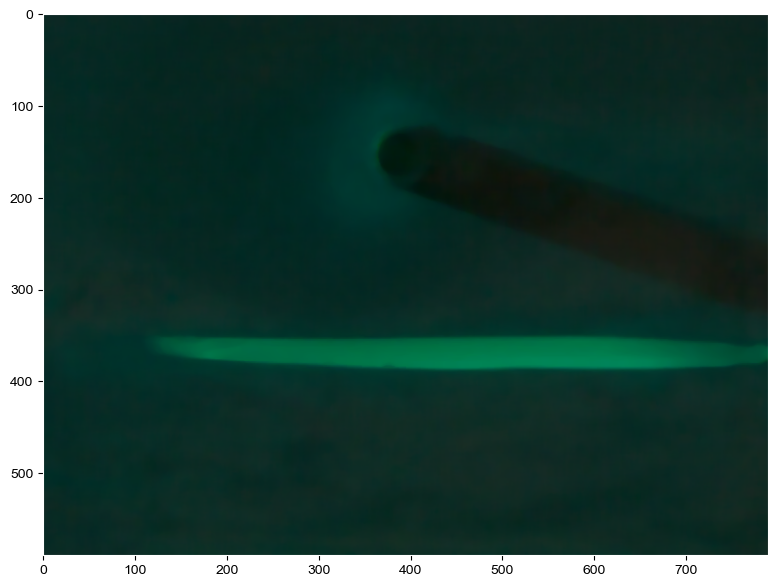

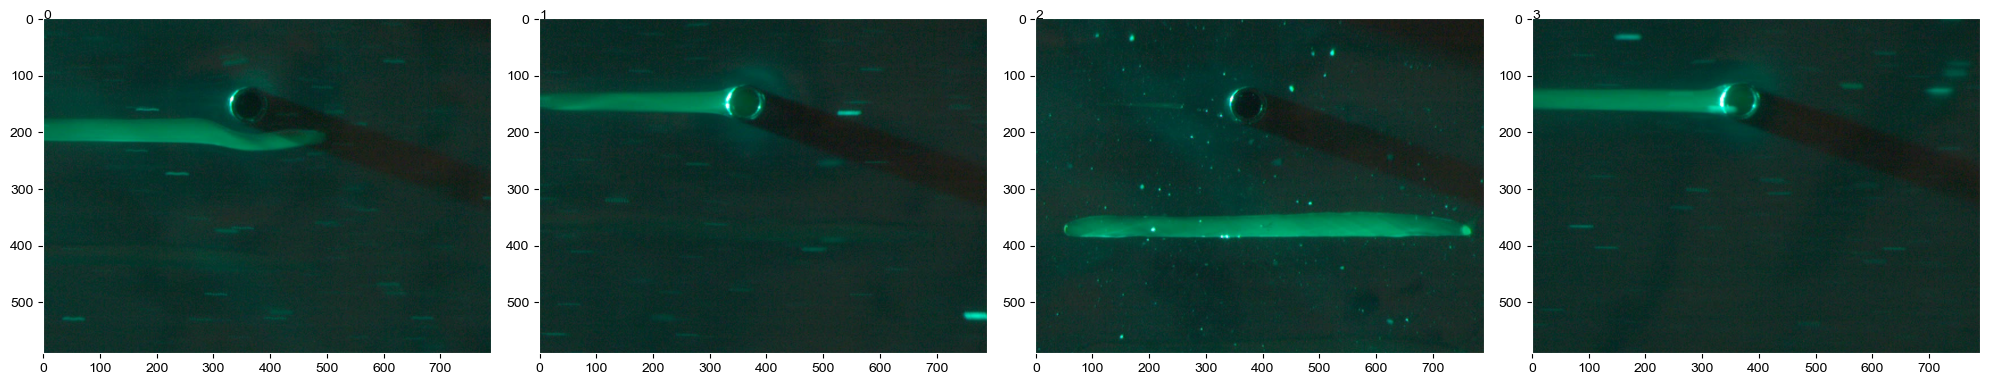

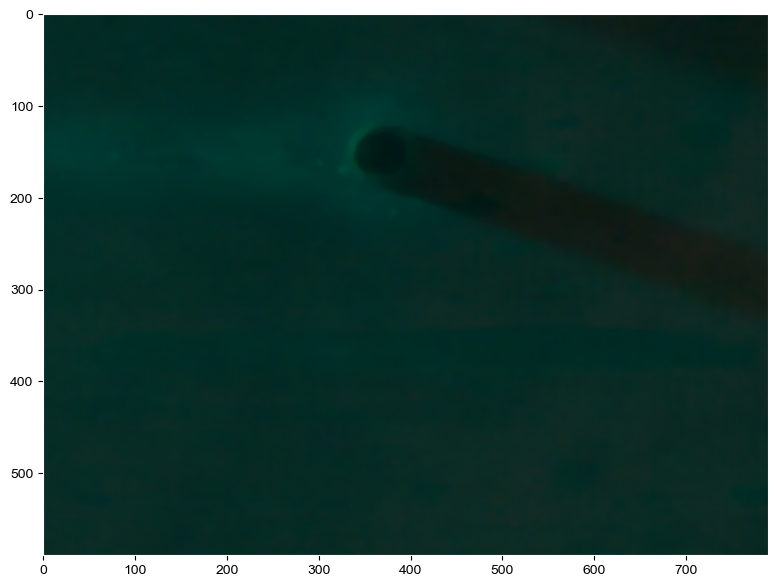

In [550]:
for name,group in ft.df[ft.df.approved==False].groupby('fostr'):
    print(name, len(group))
    sw = SDTWorkflow(os.path.join(cfg.path.server, name))
    if len(group)>5:
        sw.exportBackground(overwrite=True, diag=2, ymin=10, curveFit=False, numpics=4, mode=4, frameGetMode=1)
    sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False, overrideSegment=True, overwriteCropLocs=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230920\disturbUnder_1_1.000\disturbUnder_1_1.000_nozDims_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.csv


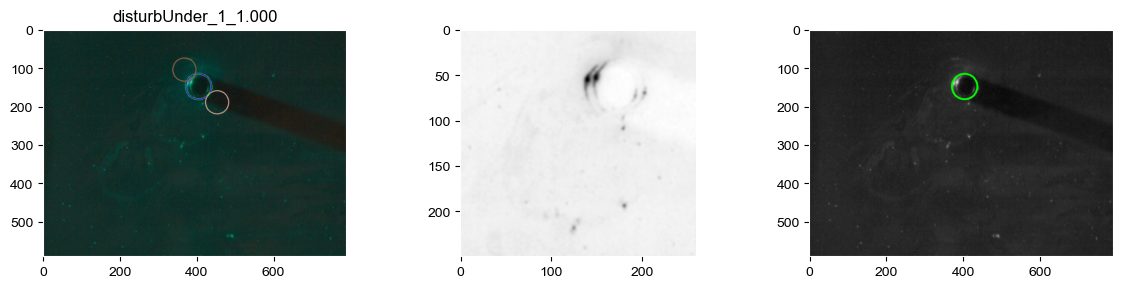

In [264]:
ft.sw.detectNozzle(overwrite=True, diag=2, bgmode=0, modes=[0], frameGetMode=2)

In [64]:
ft.sw.adjustNozzle()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230920\disturbUnder_1_1.000\disturbUnder_1_1.000_background_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png


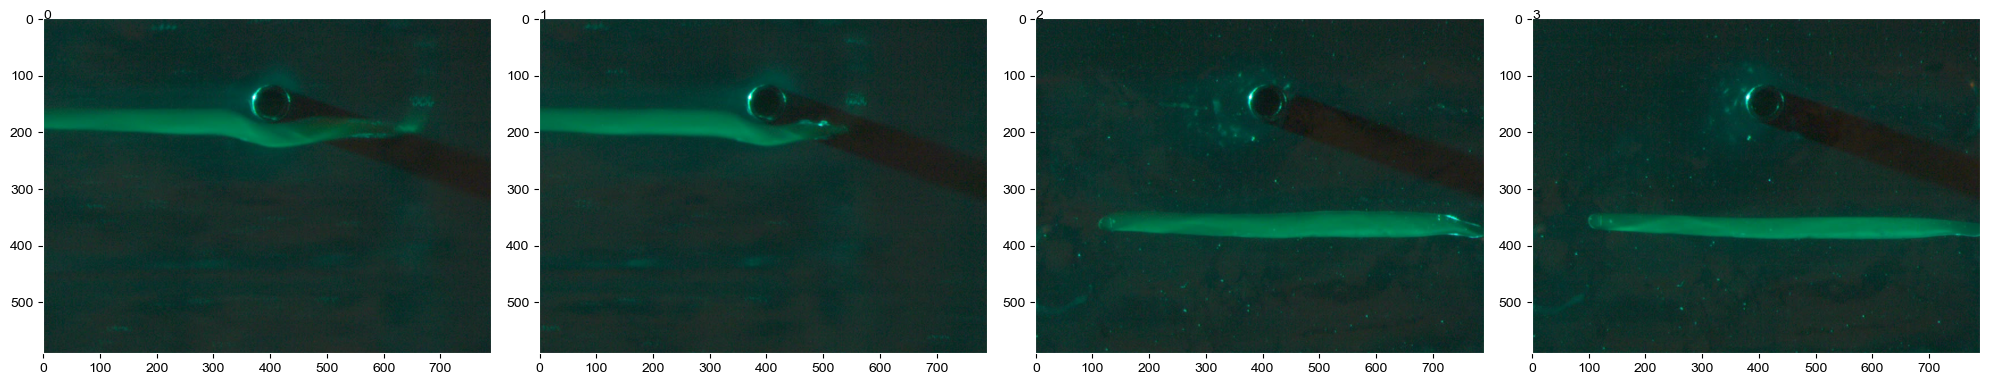

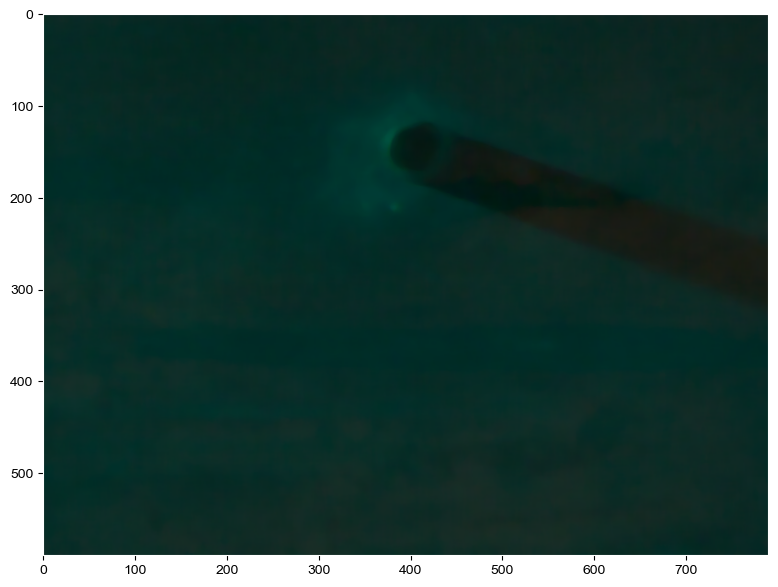

In [265]:
ft.sw.exportBackground(overwrite=True, diag=2, ymin=10, curveFit=False, numpics=4, mode=4, frameGetMode=1)

In [76]:
newcl = True
ft.sw.testAllFailures(diag=0,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

disturbUnder_2_0.500_vstill_HIh2_l0w1p5_I_PDMSS6-S85-0.05_S_3.00_230908_163942_0.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.00\I_PDMSS6-S85-0.05_S_3.00_230908\disturbUnder_2_0.500\disturbUnder_2_0.500_cropLocs_I_PDMSS6-S85-0.05_S_3.00_230908_163942_0.csv
INFO: Exported disturbUnder_2_0.500_Usegment_HIh2_l0w1p5_I_PDMSS6-S85-0.05_S_3.00_230908_163942_0.png
disturbUnder_2_0.500_vstill_HIh2_l0w2p5_I_PDMSS6-S85-0.05_S_3.00_230908_163942_0.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.00\I_PDMSS6-S85-0.05_S_3.00_230908\disturbUnder_2_0.500\disturbUnder_2_0.500_cropLocs_I_PDMSS6-S85-0.05_S_3.00_230908_163942_0.csv
INFO: Exported disturbUnder_2_0.500_Usegment_HIh2_l0w2p5_I_PDMSS6-S85-0.05_S_3.00_230908_163942_0.png
disturbUnder_2_0.500_vstill_HIh2_l1w1o8_I_PDMSS6-S85-0.05_S_3.00_230908_163942_0.png
INFO: Exported //cfs2e.nist.gov/642/internal/

In [356]:
def testImage(tag:str, newcl:bool=True):
    if len(tag)==6:
        diag = 2
    else:
        diag = 0
        # , segmentMode='horizContrast', topthresh=225
    ft.sw.testImage(tag, diag=diag,  overrideSegment=True, useML=False
                    , overwriteCropLocs=newcl, exportCropLocs=newcl, acrit=5000, topthresh=190)

INFO: Threshold: 190, product: 0.4166354860435531, white:80
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l1w1p1_I_PDMSS8-S85-0.05_S_4.00_230920_162447_9.png


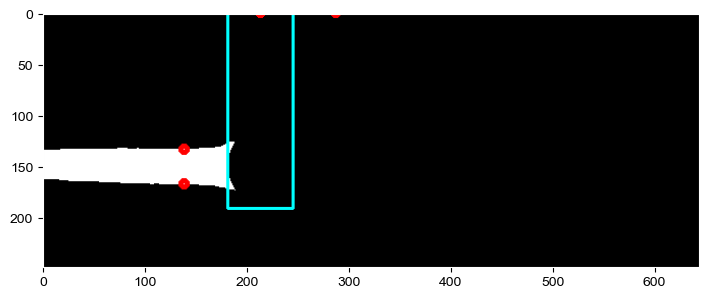

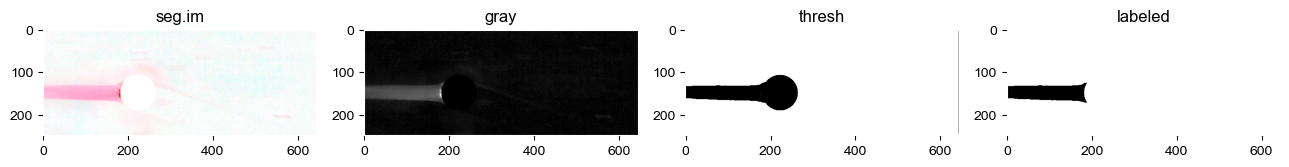

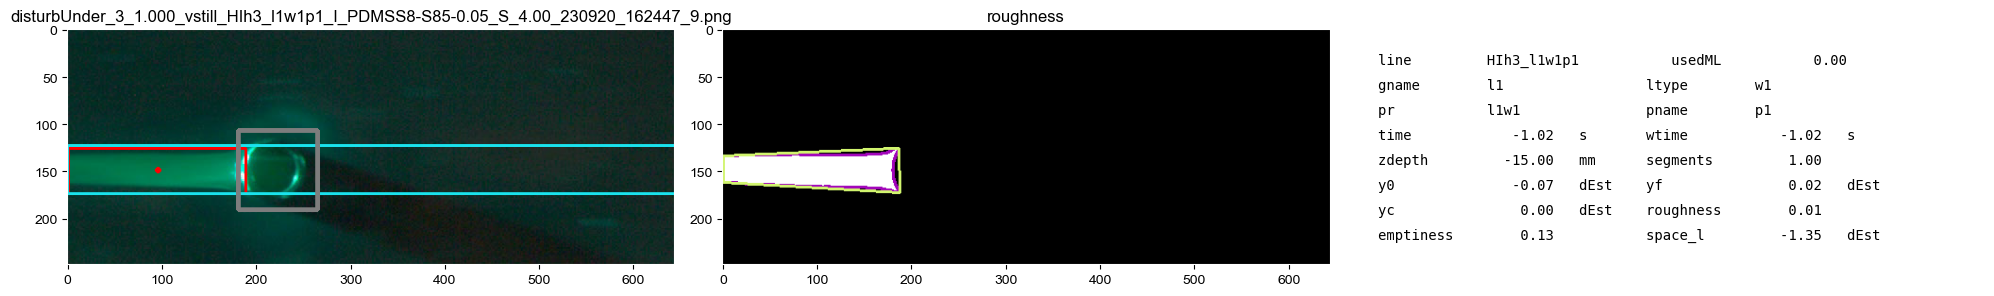

In [437]:
testImage('l1w1p1')

In [35]:
ft.sw.openLastImage(scrollDown=True, dropper=False, scrollRight=False)

In [288]:
ft.sw.openLastSeries(nmax=8, scrollDown=True, scrollRight=False, dropper=False)

In [272]:
# WHITEOUT THE LAST IMAGE
ft.sw.whiteOutLast()

INFO: Whited out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230920\disturbUnder_1_1.000\disturbUnder_1_1.000_vstill_HIh1_l2w1o8_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Blacked out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230920\disturbUnder_1_1.000\Usegment\disturbUnder_1_1.000_Usegment_HIh1_l2w1o8_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png


In [200]:
for tag in ['w2o', 'w3o']:
    testImage(tag)

INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o1_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o2_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o3_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o4_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o5_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o6_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o7_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o8_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l1w2o1_I_PDMSS9-S20-0.5_S_4.00_v2_230922_170058_1.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l1w2o2_I_PDMSS

In [1416]:
for tag in ['w2o', 'd2o']:
    testImage(tag)

INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o1_I_PDMSS7.5_S_4.00_230920_102008_0.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o2_I_PDMSS7.5_S_4.00_230920_102008_0.png
INFO: Exported disturbUnder_3_0.500_Usegment_HIh3_l0w2o3_I_PDMSS7.5_S_4.00_230920_102008_0.png



KeyboardInterrupt



In [433]:
# OVERWRITE MEASUREMENTS AND SUMMARY
ft.sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_4.00\I_PDMSS8-S85-0.05_S_4.00_230920\disturbUnder_3_0.875\disturbUnder_3_0.875_failures_I_PDMSS8-S85-0.05_S_4.00_230920_162614_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_4.00\I_PDMSS8-S85-0.05_S_4.00_230920\disturbUnder_3_0.875\disturbUnder_3_0.875_measure_I_PDMSS8-S85-0.05_S_4.00_230920_162614_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_4.00\I_PDMSS8-S85-0.05_S_4.00_230920\disturbUnder_3_0.875\disturbUnder_3_0.875_summary_I_PDMSS8-S85-0.05_S_4.00_230920_162614_6.csv


In [792]:
ft.sw.showFailures()

file             error
0  successes                  
1     l0w1o8             white
2     l0w2o8             white
3     l2w1p1  no vals detected

Empty DataFrame
Columns: [line, usedML]
Index: []

In [2182]:
ft.sw.openExplorer()

In [266]:
# OVERWRITE ALL IMAGES
ft.sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False, overrideSegment=True, overwriteCropLocs=True)

INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1o1_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1o2_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1o3_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1o4_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1o5_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1o6_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1o7_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1o8_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1p1_I_PDMSS8-S85-0.05_S_3.50_230920_165225_6.png
INFO: Exported disturbUnder_1_1.000_Usegment_HIh1_l0d1p2_I_PDMSS8-S85-0.05_S_3.50_